In [1]:
import pandas as pd #importing pandas for importing the dataset

In [2]:
adv=pd.read_csv(r"C:\Users\samee\OneDrive\Desktop\Advertising.csv")

# 1. Checking datatype of the variables

In [3]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [4]:
# All the variables have been correctly read. They have correct data type. So need to change the datatype.

# 2. Finding and dropping missing values/rows

In [5]:
adv[adv.TV.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales
68,69,NaN,27.5,11.0,NaN,12.8


In [6]:
adv = adv.dropna(subset = ['TV'])

In [7]:
adv[adv.TV.isnull()] # 1 missing value dropped for variable 'TV'

,Sno,TV,Radio,Newspaper,Day,Sales


In [8]:
adv[adv.Radio.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales
42,43,293.6,NaN,1.8,NaN,10.4


In [9]:
adv = adv.dropna(subset = ['Radio'])  # 1 missing value dropped for variable 'Radio'

In [10]:
adv[adv.Radio.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales


In [11]:
adv[adv.Newspaper.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales
16,17,67.8,36.6,NaN,NaN,3.2


In [12]:
adv = adv.dropna(subset = ['Newspaper'])  # 1 missing value dropped for variable 'Radio'

In [13]:
adv[adv.Newspaper.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales


In [14]:
adv[adv.Day.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales


In [15]:
adv[adv.Sales.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales


In [16]:
# No missing values were present in variables 'day' and 'sales'
# 1 missing value was found each in 'radio', 'Newspaper', 'TV'. One row was deleted for each of these variables.

# 3. encoding categorical variable

In [17]:
adv['Day'].unique() #checking unique values of the categorical variable 'Day'

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [18]:
pd.get_dummies(adv['Day'])[0:5] #creating dummy data

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [19]:
categorical_features = ['Day']

In [20]:
X_features = adv.columns

In [21]:
adv_encoded = pd.get_dummies( adv[X_features],columns = categorical_features,drop_first = True )

In [22]:
adv_encoded.columns

Index(['Sno', 'TV', 'Radio', 'Newspaper', 'Sales', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')

# 4. Descriptive summary of numerical variables

In [24]:
adv_encoded.describe() #descriptive summary of all numerical variables

,Sno,TV,Radio,Newspaper,Sales,Day_Weekdays,Day_Weekend
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,101.375635,146.242132,23.152284,30.375635,14.102030,0.766497,0.213198
std,57.818691,85.439138,14.922793,20.972370,5.192302,0.424137,0.410610
min,1.000000,0.700000,0.000000,0.300000,1.600000,0.000000,0.000000
25%,52.000000,74.700000,9.900000,12.900000,10.400000,1.000000,0.000000
50%,102.000000,149.700000,22.300000,25.900000,12.900000,1.000000,0.000000
75%,151.000000,218.400000,36.500000,45.100000,17.400000,1.000000,0.000000
max,200.000000,296.400000,49.600000,100.900000,27.000000,1.000000,1.000000


# 6. Spitting dataset into train and test

In [25]:
import statsmodels.api as sm #importing statsmodel for stastical calculations
from sklearn.model_selection import train_test_split #importing sklearn for splitting data 
X = sm.add_constant( adv_encoded ) #specifying independent variables
Y = adv ['Sales'] #specifying dependent variable
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 33 ) #splitting data in 70:30 with random state 33

In [26]:
model = sm.OLS(train_y, train_X).fit()

In [27]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                  OLS                Adj. R-squared:       1.000     
Dependent Variable:     Sales              AIC:                  -9928.1112
Date:                   2020-08-29 04:34   BIC:                  -9903.6612
No. Observations:       157                Log-Likelihood:       4972.1    
Df Model:               7                  F-statistic:          3.144e+31 
Df Residuals:           149                Prob (F-statistic):   0.00      
R-squared:              1.000              Scale:                1.9177e-29
---------------------------------------------------------------------------
              Coef.  Std.Err.           t            P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
const         0.0000   0.0000                 0.5449 0.5866 -0.0000  0.0000
Sno           0.0000   0.0000                 1.3881 0.1672 -0.0000  0.0000
TV            0.0000   0.0000                 3.2726 0.0013  0.0000  0.0000
Radio        -0.0000   0.0000                -2.2816 0.0239 -0.0000 -0.0000
Newspaper     0.0000   0.0000                 0.7490 0.4550 -0.0000  0.0000
Sales         1.0000   0.0000 14762328024851590.0000 0.0000  1.0000  1.0000
Day_Weekdays  0.0000   0.0000                 1.4850 0.1397 -0.0000  0.0000
Day_Weekend  -0.0000   0.0000                -2.6828 0.0081 -0.0000 -0.0000
---------------------------------------------------------------------------
Omnibus:                  11.831          Durbin-Watson:             1.798 
Prob(Omnibus):            0.003           Jarque-Bera (JB):          12.951
Skew:                     0.685           Prob(JB):                  0.002 
Kurtosis:                 2.678           Condition No.:             2669  
===========================================================================
* The condition number is large (3e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

# 7. Model Validity

# A. Residual Analysis

In [28]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<Figure size 576x432 with 0 Axes>

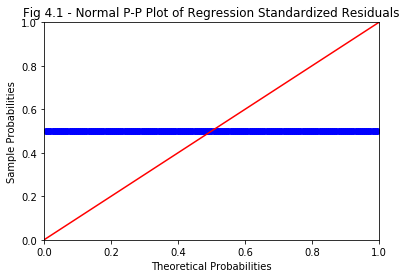

In [29]:
adv_resid = model.resid # Checking normality
probplot = sm.ProbPlot( adv_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

In [30]:
def get_standardized_values( vals ): #Checking homoscedasticity
 return (vals - vals.mean())/vals.std()

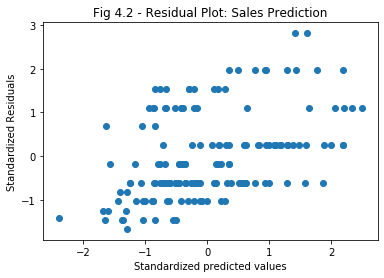

In [31]:
plt.scatter( get_standardized_values( model.fittedvalues ),
get_standardized_values( adv_resid ) )
plt.title( "Fig 4.2 - Residual Plot: Sales Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

# B. Outlier Analysis

In [32]:
from scipy.stats import zscore

In [33]:
adv['z_score_sales'] = zscore( adv.Sales ) # Z-score

In [34]:
adv[ (adv.z_score_sales > 3.0) | (adv.z_score_sales < -3.0) ]

,Sno,TV,Radio,Newspaper,Day,Sales,z_score_sales


In [35]:
import numpy as np

C:\Users\samee\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


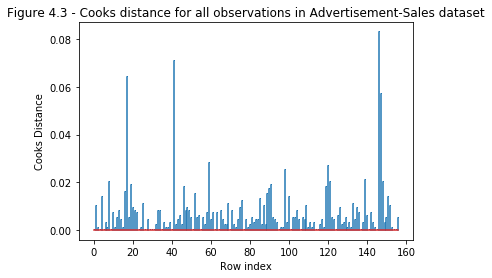

In [36]:
adv_influence = model.get_influence() #Cook's Distance
(c, p) = adv_influence.cooks_distance
plt.stem( np.arange( len( train_X) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( "Figure 4.3 - Cooks distance for all observations in Advertisement-Sales dataset" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance");

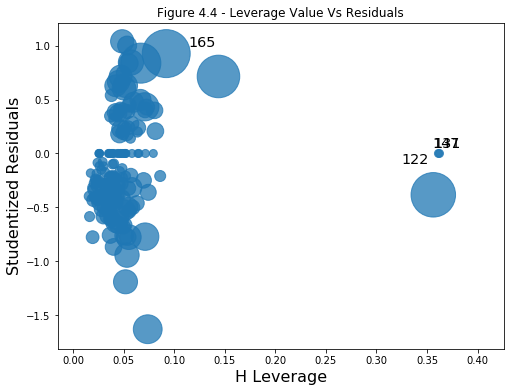

In [37]:
from statsmodels.graphics.regressionplots import influence_plot #Leverage Values
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( model, ax = ax )
plt.title( "Figure 4.4 - Leverage Value Vs Residuals")
plt.show();

# 5. Visualisation Grpahs and Inference

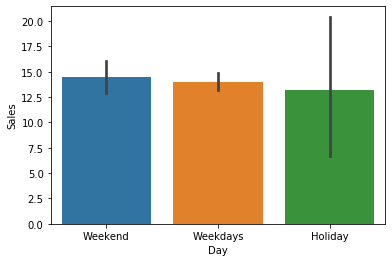

In [38]:
sn.barplot(x = 'Day', y = 'Sales', data = adv)

In [39]:
# Inference: Sales is the highest during weekends and least on holidays.

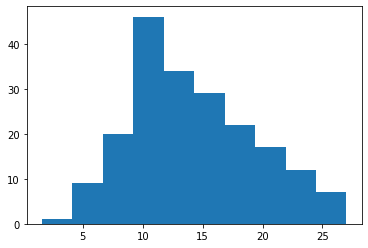

In [40]:
plt.hist( adv_encoded['Sales'] );

In [41]:
# Inference: Highest daily sales achieved is near Rs 10 million.

# 8. Calculating RMSE

In [42]:
pred_y = np.power( model.predict( test_X[train_X.columns] ), 2) #Making predictions

In [43]:
from sklearn import metrics # For calculations

In [44]:
np.sqrt(metrics.mean_squared_error(pred_y, test_y)) # Checking RMSE

265.0478945492682

In [45]:
np.round( metrics.r2_score(pred_y, test_y), 2 )

-2.01